## Data exploration

#### Andalusian Hotels Reviews
https://www.kaggle.com/datasets/chizhikchi/andalusian-hotels-reviews-unbalanced?select=Big_AHR.csv

In [1]:
%%capture
!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_raw = pd.read_csv('../data/raw/Big_AHR.csv')

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18172 entries, 0 to 18171
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   18172 non-null  int64 
 1   title        18172 non-null  object
 2   rating       18172 non-null  int64 
 3   review_text  18172 non-null  object
 4   location     16356 non-null  object
 5   hotel        16356 non-null  object
 6   label        18172 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 993.9+ KB


In [5]:
df_raw.describe()

,Unnamed: 0,rating,label
count,18172.000000,18172.000000,18172.000000
mean,9085.500000,3.984151,1.103291
std,5245.948881,1.292239,0.798061
min,0.000000,1.000000,0.000000
25%,4542.750000,3.000000,1.000000
50%,9085.500000,4.000000,1.000000
75%,13628.250000,5.000000,1.000000
max,18171.000000,5.000000,3.000000


In [30]:
df_raw.sample(2)

,Unnamed: 0,title,rating,review_text,location,hotel,label
12087,12087,genial,5,"La estancia fue muy agradable, el personal súp...",Cordoba_Province_of_Cordoba_Andalucia,Albergue_Juvenil_de_Cordoba,1
1581,1581,Buena situación,4,"La ubicación es magnifica, puedes ir andando a...",Seville_Province_of_Seville_Andalucia,Petit_Palace_Canalejas_Sevilla,1


In [5]:
df = df_raw.copy()

In [6]:
df = df.drop(columns=['Unnamed: 0'])

In [7]:
df = df.fillna('Unknown')
df = df.replace('nan', 'Unknown')

##### Location (provinces)

In [8]:
def province(text):
    provinces = ['Almeria', 'Granada', 'Malaga', 'Jaen', 'Cordoba', 'Seville', 'Cadiz', 'Huelva']
    for province in provinces:
        if province in text:
            prov = province
            break
        else:
            prov = 'Unknown'
    return prov

In [9]:
df['province'] = df['location'].apply(province)

In [9]:
df['province'].value_counts()

Granada    3666
Seville    3420
Cordoba    3298
Malaga     2982
Unknown    1876
Jaen       1274
Almeria    1091
Huelva      545
Cadiz        20
Name: province, dtype: int64

In [10]:
dict_provinces = dict(df['province'].value_counts())
provinces = list(dict_provinces.keys())
hotel_count = list(dict_provinces.values())

In [11]:
df_provinces = pd.DataFrame({'province':provinces, 'hotel_count':hotel_count})

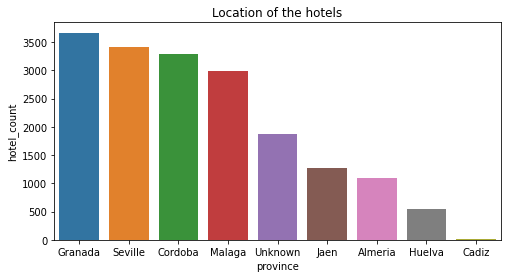

In [12]:
plt.figure(figsize=(8,4))
sns.barplot(data=df_provinces, x='province', y='hotel_count')
plt.title('Location of the hotels')
plt.show()

##### Rating given by Tripadvisor users (1 to 5 stars)

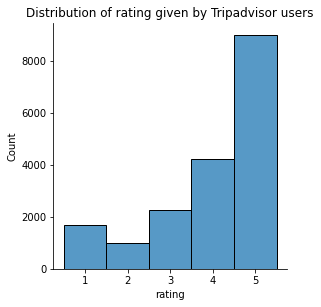

In [13]:
rating = sns.displot(data=df, x='rating', discrete=True)
rating.fig.set_size_inches(4,4)
plt.title('Distribution of rating given by Tripadvisor users')
plt.show()

##### Top 6 hotels with most reviews

In [14]:
df['hotel'].value_counts()

Unknown                                              1816
Carmen_de_Ramilla                                     120
Apartamentos_Mauror                                   100
Hotel_Xauen                                            80
Hotel_Infanta_Cristina                                 80
                                                     ... 
Paraiso_De_Magina                                       4
Ecosmart_Apartments_Granada                             4
La_Esperanza_Granada                                    3
Finca_El_Juncal                                         3
Radisson_Collection_Hotel_Magdalena_Plaza_Sevilla       3
Name: hotel, Length: 716, dtype: int64

In [15]:
dict_rating = dict(df_raw['hotel'].value_counts())
hotel = list(dict_rating.keys())
review_count = list(dict_rating.values())

In [16]:
df_rating = pd.DataFrame({'hotel':hotel, 'review_count':review_count}).head(6)

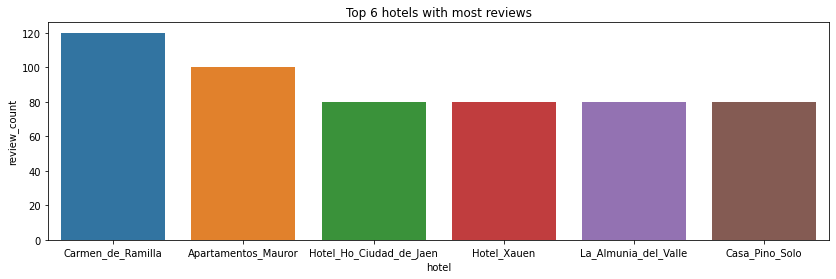

In [17]:
plt.figure(figsize=(14,4))
sns.barplot(data=df_rating, x='hotel', y='review_count')
plt.title('Top 6 hotels with most reviews')
plt.show()

##### Rating given by Tripadvisor users (1 to 5 stars) - Top 6 hotels with most reviews

In [11]:
top_hoteles = pd.DataFrame(df_raw['hotel'].value_counts()).head(6).to_dict()['hotel']

In [12]:
top_hoteles

{'Carmen_de_Ramilla': 120,
 'Apartamentos_Mauror': 100,
 'Hotel_Ho_Ciudad_de_Jaen': 80,
 'Hotel_Xauen': 80,
 'La_Almunia_del_Valle': 80,
 'Casa_Pino_Solo': 80}

In [13]:
lista_keys = list(top_hoteles.keys())

In [14]:
lista_keys

['Carmen_de_Ramilla',
 'Apartamentos_Mauror',
 'Hotel_Ho_Ciudad_de_Jaen',
 'Hotel_Xauen',
 'La_Almunia_del_Valle',
 'Casa_Pino_Solo']

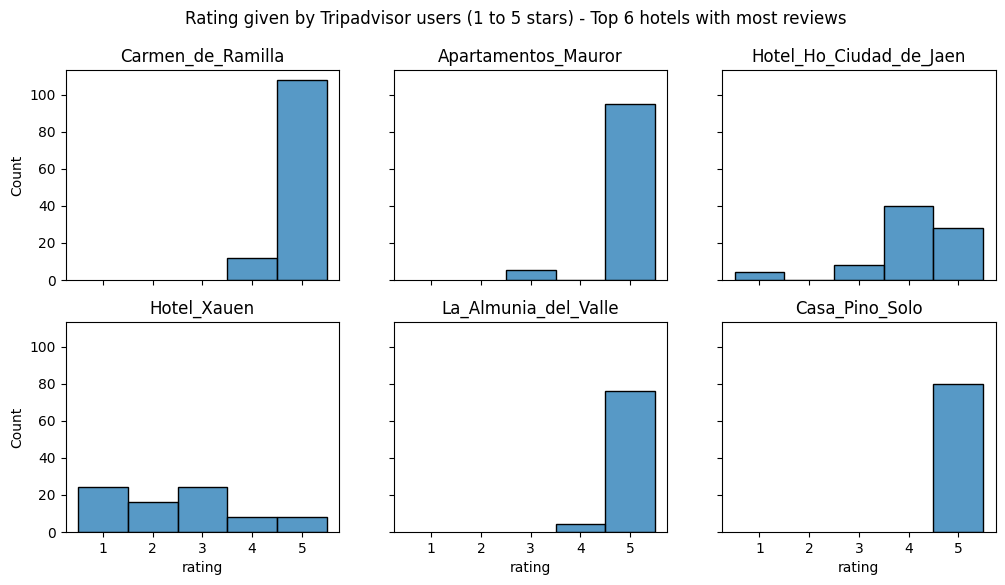

In [25]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12,6))
ax = ax.flatten()
fig.suptitle('Rating given by Tripadvisor users (1 to 5 stars) - Top 6 hotels with most reviews')
for i in range(len(lista_keys)):
    ax[i].set_title(lista_keys[i])
    hotel = lista_keys[i]
    rating = sns.histplot(data=df[df['hotel']==hotel], x='rating', discrete=True, ax=ax[i])
plt.show()

##### Distribution of number of reviews

In [21]:
df_raw['hotel'].value_counts()

Carmen_de_Ramilla                                    120
Apartamentos_Mauror                                  100
Hotel_Ho_Ciudad_de_Jaen                               80
Hotel_Xauen                                           80
La_Almunia_del_Valle                                  80
                                                    ... 
Nixar                                                  4
Apartamentos_Turisticos_Vista_Alhambra                 4
La_Esperanza_Granada                                   3
Finca_El_Juncal                                        3
Radisson_Collection_Hotel_Magdalena_Plaza_Sevilla      3
Name: hotel, Length: 715, dtype: int64

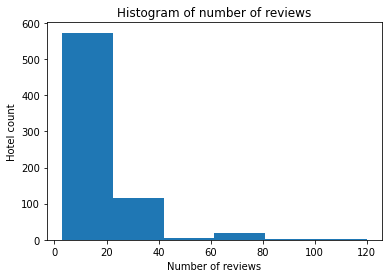

In [22]:
plt.figure(figsize=(6, 4))
plt.hist(df_raw['hotel'].value_counts(), bins=6)
plt.title('Histogram of number of reviews')
plt.xlabel('Number of reviews')
plt.ylabel('Hotel count')
plt.show()

##### Save csv with columns rating, hotel and location

In [25]:
df_pbi = df.drop(columns=['title', 'review_text', 'location', 'label'])

In [26]:
df_pbi.to_csv('data/processed/pbi.csv')